# **Neural Networks from Scratch**



In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [9]:
def createData():
  x = np.linspace(-1, 1, 30000)
  y= 0.2*(x**4)+2*(x**3)+0.1*(x**2) + 10
  return x,y

In [10]:
def get_dataset(shuffle):
  x,y=createData()
  if shuffle:
    shuffledIndexes = np.arange(x.shape[0])
    np.random.shuffle(np.arange(x.shape[0]))
    x = x[shuffledIndexes]
    y = y[shuffledIndexes]
  return x, y

In [120]:
def splitDataset(data, ratio):
  train, test= train_test_split(data, test_size=ratio, random_state=0, shuffle=False)
  train = train.reset_index(drop=True)
  test = test.reset_index(drop=True)
  return train, test

In [12]:
def normalize(data):
  data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))
  return data_normalized


In [13]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def calculateErrors(expected, actual):
  r2 = r2_score(expected, actual)
  mae = mean_absolute_error(expected, actual)
  mse = mean_squared_error(expected, actual)
  rmse = np.sqrt(mse)
  return r2, mae, mse, rmse

# **Processing Cases**

### Variables Definition

* **Data split ratios:** 30% training set, 20% validation set, and 50% test set.
* **Number of epochs:** 20
* **Bath size:** 12
* **Loss function:** MSE
* **Optimizer:** Adam




## **Case 1:**
* Data: Use shuffled and unscaled data.
* NN structure: Structure 1.
* Activation function: Relu.

In [14]:
x,y=get_dataset(True)
df= pd.DataFrame({'x':x,'y':y})


In [16]:
train, test = splitDataset(df, 0.5)
train, val = splitDataset(train, 0.4)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model=Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='mse')

In [20]:

offset = model.fit(
    train[['x']],
    train['y'],
    epochs=20,
    batch_size=12,
    validation_data=(val[['x']], val['y'])
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 53.2962 - val_loss: 0.0499
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0329 - val_loss: 0.0088
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0063 - val_loss: 0.0031
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.9823e-04 - val_loss: 8.0510e-04
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 8.3684e-04 - val_loss: 7.1320e-04
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.8194e-04 - val_loss: 6.0101e-04
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 6.5836e-04 - val_loss: 0.0010
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.9833e-04 - val_loss: 7.4576e-04
Epoch 12/20
750

In [21]:
predictions=model.predict(test[['x']])
predictions.shape

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


(15000, 1)

## Plots

### Plotting Actual input vs actual output


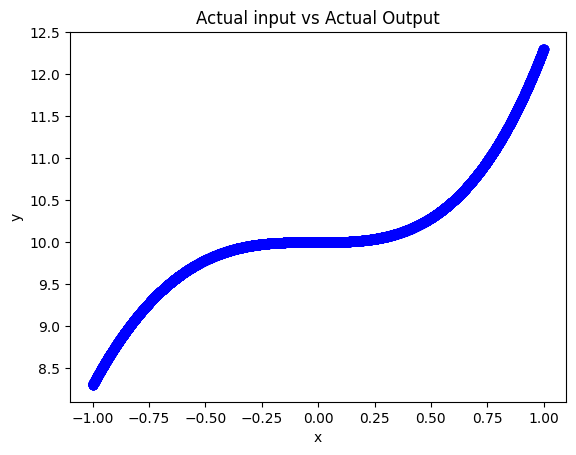

In [22]:
plt.scatter(test['x'], test['y'], color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Actual Output")
plt.show()

### Plotting Actual input vs predicted output

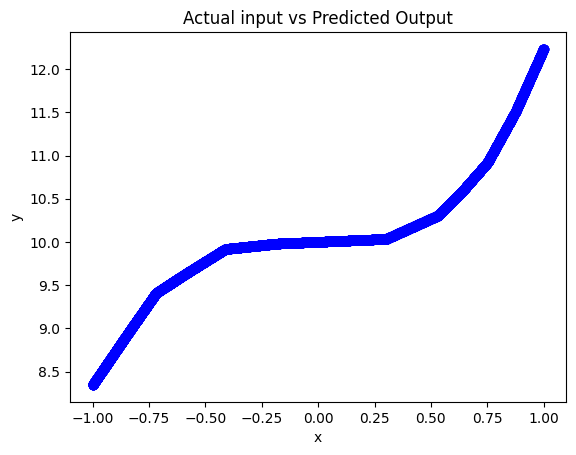

In [23]:
plt.scatter(test['x'], predictions, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Predicted Output")
plt.show()

In [24]:
r2, mae, mse, rmse=calculateErrors(test['y'], predictions)
print("R2: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

R2:  0.9993709397256627
MAE:  0.015199261392568388
MSE:  0.0003595050980012572
RMSE:  0.018960619662902824


## **Case 2:**
* **Data:** Use shuffled and unscaled data.
* **NN structure:** Structure 2.
* **Activation function:** Relu.


In [25]:
model=Sequential()
model.add(Dense(24, input_dim=1, activation='relu'))
model.add(Dense(1, activation='linear'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer='adam', loss='mse')

In [27]:

offset = model.fit(
    train[['x']],
    train['y'],
    epochs=20,
    batch_size=12,
    validation_data=(val[['x']], val['y'])
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 67.2662 - val_loss: 0.1461
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1175 - val_loss: 0.1045
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1054 - val_loss: 0.0999
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1011 - val_loss: 0.0974
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0991 - val_loss: 0.0974
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0997 - val_loss: 0.0966
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0993 - val_loss: 0.0965
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0988 - val_loss: 0.0947
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0983 - val_loss: 0.0943
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0983 - val_loss: 0.0910
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0924 - val_loss: 0.0893
Epoch 12/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/ste

In [28]:
predictions=model.predict(test[['x']])
predictions.shape

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


(15000, 1)

## Plots

### Plotting Actual input vs actual output


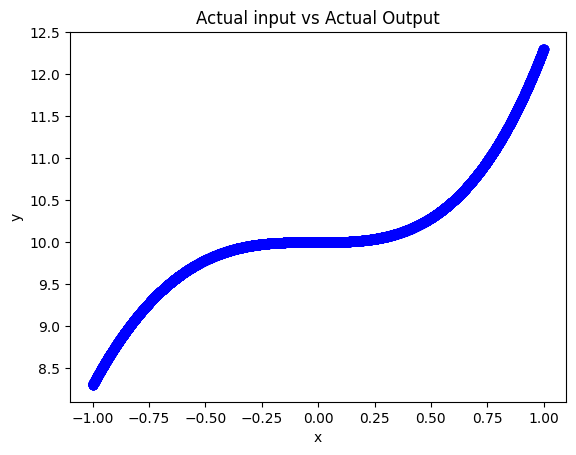

In [29]:
plt.scatter(test['x'], test['y'], color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Actual Output")
plt.show()

### Plotting Actual input vs predicted output

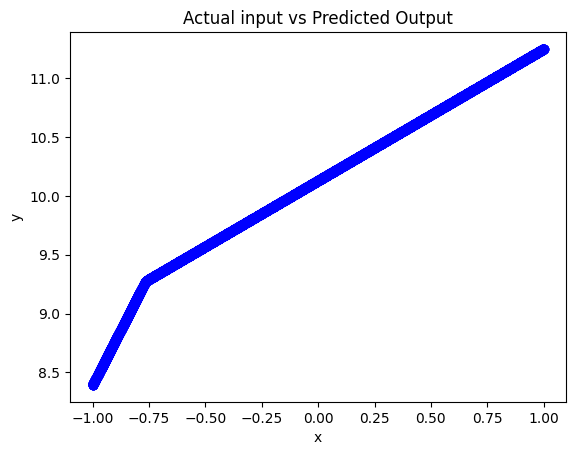

In [30]:
plt.scatter(test['x'], predictions, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Predicted Output")
plt.show()

In [31]:
r2, mae, mse, rmse=calculateErrors(test['y'], predictions)
print("R2: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

R2:  0.8523406939482457
MAE:  0.22255449319621953
MSE:  0.08438662471392155
RMSE:  0.29049376019791123


## **Case 3:**
* **Data:** Use shuffled and unscaled data.
* **NN structure:** Structure 1.
* **Activation function:** tanh.

In [32]:
model=Sequential()
model.add(Dense(12, input_dim=1, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer='adam', loss='mse')

In [34]:

offset = model.fit(
    train[['x']],
    train['y'],
    epochs=20,
    batch_size=12,
    validation_data=(val[['x']], val['y'])
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 63.3198 - val_loss: 18.3025
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 13.6600 - val_loss: 3.9319
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8828 - val_loss: 0.8626
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.7637 - val_loss: 0.5725
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5965 - val_loss: 0.3171
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3107 - val_loss: 0.2220
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2113 - val_loss: 0.1772
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1746 - val_loss: 0.1583
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1690 - val_loss: 0.1400
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1396 - val_loss: 0.1085
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0888 - val_loss: 0.0306
Epoch 12/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/s

In [35]:
predictions=model.predict(test[['x']])
predictions.shape

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


(15000, 1)

## Plots

### Plotting Actual input vs actual output


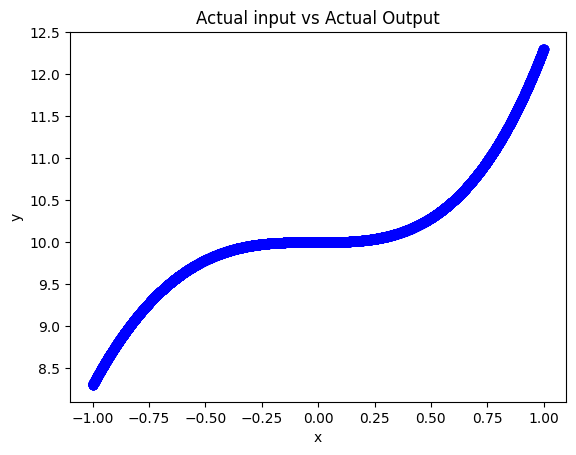

In [36]:
plt.scatter(test['x'], test['y'], color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Actual Output")
plt.show()

### Plotting Actual input vs predicted output

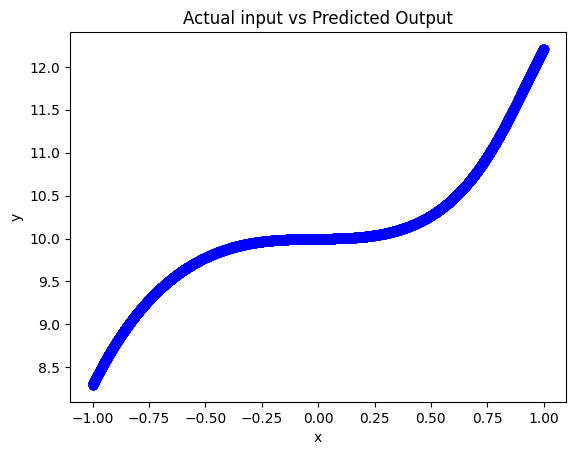

In [37]:
plt.scatter(test['x'], predictions, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Predicted Output")
plt.show()

In [38]:
r2, mae, mse, rmse=calculateErrors(test['y'], predictions)
print("R2: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

R2:  0.9996365996351505
MAE:  0.010631173063780818
MSE:  0.0002076816628049692
RMSE:  0.014411164519391527


## **Case 4:**
* **Data:** Use shuffled and scaled data. First, shuffle the data then split the data and finally scale the data (both x and y).
* **NN structure:** Structure 1.
* **Activation function:** Relu.


In [39]:
normalizedTrain=normalize(train)
normalizedVal=normalize(val)
normalizedTest=normalize(test)

In [40]:
model=Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.compile(optimizer='adam', loss='mse')

In [42]:

offset = model.fit(
    normalizedTrain[['x']],
    normalizedTrain['y'],
    epochs=20,
    batch_size=12,
    validation_data=(normalizedVal[['x']], normalizedVal['y'])
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2502 - val_loss: 7.1210e-04
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.9775e-04 - val_loss: 5.9844e-04
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.1926e-04 - val_loss: 5.5881e-04
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 5.7743e-04 - val_loss: 5.7468e-04
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.7241e-04 - val_loss: 5.5301e-04
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.9332e-04 - val_loss: 5.6384e-04
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.1206e-04 - val_loss: 5.5638e-04
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 5.8045e-04 - val_loss: 5.5360e-04
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.8088e-04 - val_loss: 5.6235e-04
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.0007e-04 - val_loss: 6.5711e-04
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.

In [43]:
predictions=model.predict(normalizedTest[['x']])
predictions.shape

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(15000, 1)

## Plots

### Plotting Actual input vs actual output


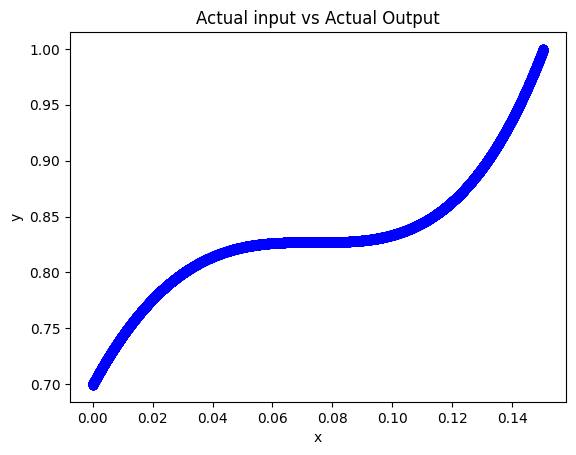

In [44]:
plt.scatter(normalizedTest['x'], normalizedTest['y'], color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Actual Output")
plt.show()

### Plotting Actual input vs predicted output

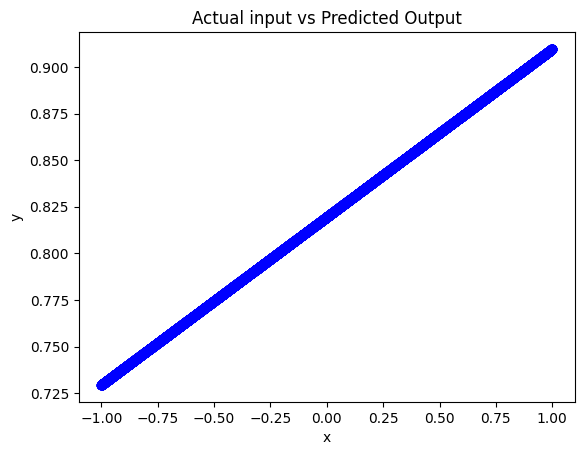

In [45]:
plt.scatter(test['x'], predictions, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Predicted Output")
plt.show()

In [46]:
r2, mae, mse, rmse=calculateErrors(test['y'], predictions)
print("R2: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

R2:  -149.32915829325827
MAE:  9.241739614946226
MSE:  85.91243317916285
RMSE:  9.268896006491973


## **Case 5:**
* **Data:** Use shuffled and scaled data. First, shuffle the data then split the data and finally scale the data (both x and y).
* **NN structure:** Structure 1.
* **Activation function:** tanh.


In [47]:
model=Sequential()
model.add(Dense(12, input_dim=1, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(optimizer='adam', loss='mse')

In [49]:

offset = model.fit(
    normalizedTrain[['x']],
    normalizedTrain['y'],
    epochs=20,
    batch_size=12,
    validation_data=(normalizedVal[['x']], normalizedVal['y'])
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0827 - val_loss: 5.9352e-04
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.1289e-04 - val_loss: 5.7580e-04
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 6.1378e-04 - val_loss: 6.0616e-04
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6.2065e-04 - val_loss: 7.0093e-04
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.1158e-04 - val_loss: 5.8548e-04
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6.3455e-04 - val_loss: 7.3079e-04
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6.3164e-04 - val_loss: 5.7995e-04
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6.2643e-04 - val_loss: 5.7112e-04
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.0360e-04 - val_loss: 5.9489e-04
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.1043e-04 - val_loss: 6.0361e-04
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.

In [50]:
predictions=model.predict(normalizedTest[['x']])
predictions.shape

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(15000, 1)

## Plots

### Plotting Actual input vs actual output


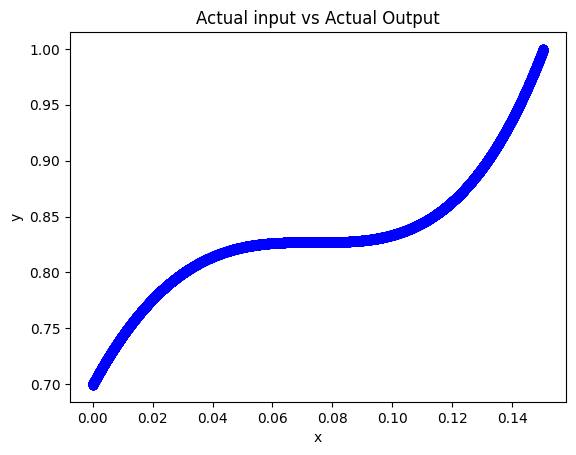

In [51]:
plt.scatter(normalizedTest['x'], normalizedTest['y'], color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Actual Output")
plt.show()

### Plotting Actual input vs predicted output

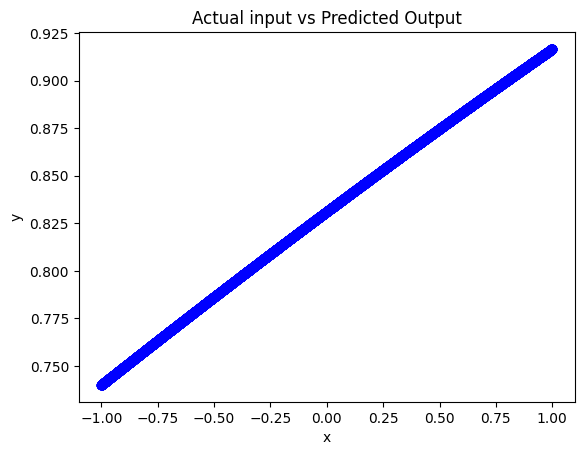

In [52]:
plt.scatter(test['x'], predictions, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Predicted Output")
plt.show()

In [53]:
r2, mae, mse, rmse=calculateErrors(test['y'], predictions)
print("R2: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

R2:  -148.98563485597413
MAE:  9.231037901785552
MSE:  85.71611109044619
RMSE:  9.258299578780447


## Repeating with no shuffling

In [121]:
x,y=get_dataset(False)
df= pd.DataFrame({'x':x,'y':y})\



In [122]:
df

,x,y
0,-1.000000,8.300000
1,-0.999933,8.300333
2,-0.999867,8.300667
3,-0.999800,8.301000
4,-0.999733,8.301333
...,...,...
29995,0.999733,12.298134
29996,0.999800,12.298600
29997,0.999867,12.299067
29998,0.999933,12.299533


In [123]:
train, test = splitDataset(df, 0.5)
train, val = splitDataset(train, 0.4)

In [124]:
test.head()

,x,y
0,0.000033,10.0
1,0.000100,10.0
2,0.000167,10.0
3,0.000233,10.0
4,0.000300,10.0


## **Case 1:**
* Data: Use unshuffled and unscaled data.
* NN structure: Structure 1.
* Activation function: Relu.

In [125]:
model=Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [126]:
model.compile(optimizer='adam', loss='mse')

In [127]:

offset = model.fit(
    train[['x']],
    train['y'],
    epochs=20,
    batch_size=12,
    validation_data=(val[['x']], val['y'])
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 83.5203 - val_loss: 85.3445
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 70.5463 - val_loss: 72.6922
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 59.2556 - val_loss: 61.3666
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 49.2534 - val_loss: 51.2338
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 40.1956 - val_loss: 42.1977
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 32.3026 - val_loss: 34.1963
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 25.3355 - val_loss: 27.1759
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 19.4117 - val_loss: 21.1010
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 14.4473 - val_loss: 15.9330
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 10.3144 - val_loss: 11.6350
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.9564 - val_loss: 8.1602
Epoch 12/20
750/750 ━━━━━━━━━━━━

In [128]:
predictions=model.predict(test[['x']])
predictions.shape

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


(15000, 1)

## Plots

### Plotting Actual input vs actual output


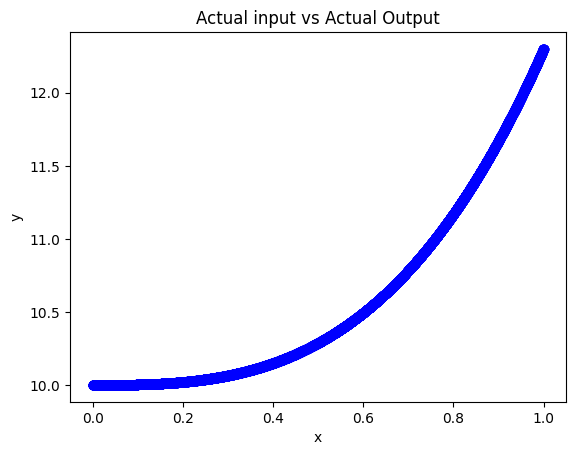

In [129]:
plt.scatter(test['x'], test['y'], color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Actual Output")
plt.show()

### Plotting Actual input vs predicted output

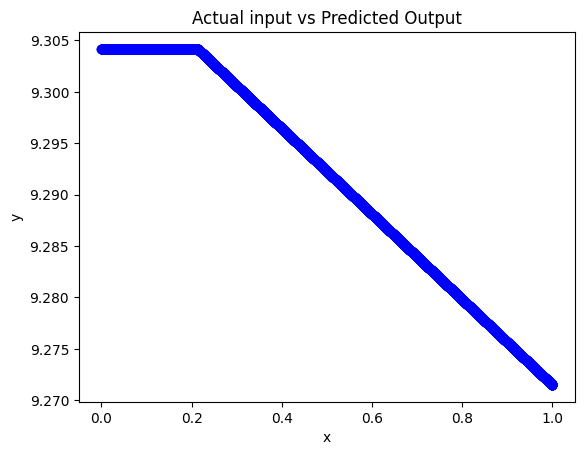

In [130]:
plt.scatter(test['x'], predictions, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Predicted Output")
plt.show()

In [131]:
r2, mae, mse, rmse=calculateErrors(test['y'], predictions)
print("R2: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

R2:  -3.930021808040739
MAE:  1.2820697293849088
MSE:  2.078636174611726
RMSE:  1.4417476112731125


## **Case 2:**
* **Data:** Use unshuffled and unscaled data.
* **NN structure:** Structure 2.
* **Activation function:** Relu.


In [132]:
model=Sequential()
model.add(Dense(24, input_dim=1, activation='relu'))
model.add(Dense(1, activation='linear'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [133]:
model.compile(optimizer='adam', loss='mse')

In [134]:

offset = model.fit(
    train[['x']],
    train['y'],
    epochs=20,
    batch_size=12,
    validation_data=(val[['x']], val['y'])
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 64.2859 - val_loss: 17.0038
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.1424 - val_loss: 11.7429
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.6782 - val_loss: 8.9427
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2552 - val_loss: 5.1550
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6938 - val_loss: 2.0921
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2138 - val_loss: 0.5109
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0274 - val_loss: 0.2055
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0074 - val_loss: 0.2367
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0052 - val_loss: 0.2363
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0028 - val_loss: 0.1827
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0016 - val_loss: 0.1461
Epoch 12/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/s

In [135]:
predictions=model.predict(test[['x']])
predictions.shape

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


(15000, 1)

## Plots

### Plotting Actual input vs actual output


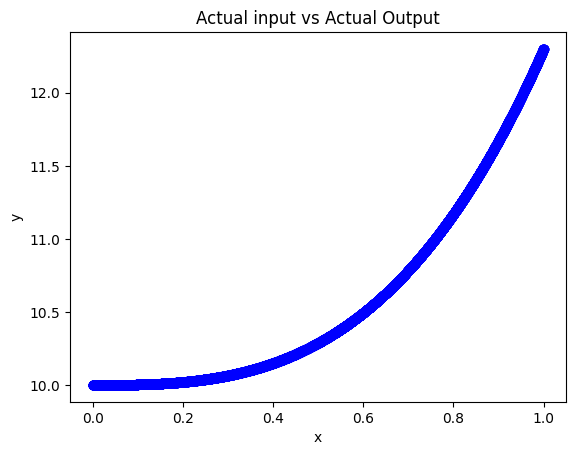

In [136]:
plt.scatter(test['x'], test['y'], color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Actual Output")
plt.show()

### Plotting Actual input vs predicted output

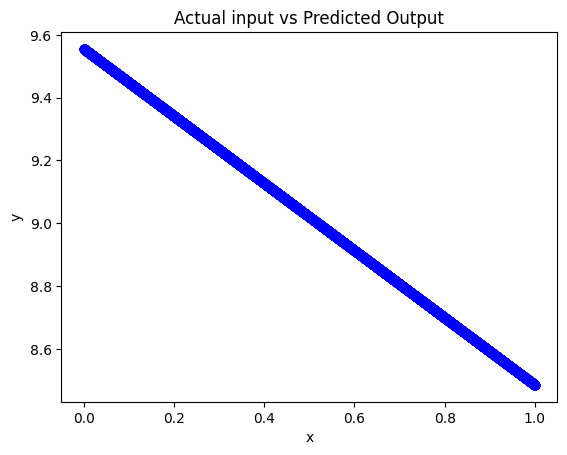

In [137]:
plt.scatter(test['x'], predictions, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Predicted Output")
plt.show()

In [138]:
r2, mae, mse, rmse=calculateErrors(test['y'], predictions)
print("R2: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

R2:  -6.81716016415467
MAE:  1.5529991081487433
MSE:  3.2959350957522906
RMSE:  1.8154710396346978


## **Case 3:**
* **Data:** Use unshuffled and unscaled data.
* **NN structure:** Structure 1.
* **Activation function:** tanh.

In [139]:
model=Sequential()
model.add(Dense(12, input_dim=1, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [140]:
model.compile(optimizer='adam', loss='mse')

In [141]:

offset = model.fit(
    train[['x']],
    train['y'],
    epochs=20,
    batch_size=12,
    validation_data=(val[['x']], val['y'])
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 50.1036 - val_loss: 19.0447
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9.6356 - val_loss: 4.5507
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5181 - val_loss: 1.0938
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2834 - val_loss: 0.5285
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2143 - val_loss: 0.4556
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2152 - val_loss: 0.4585
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2109 - val_loss: 0.4583
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2105 - val_loss: 0.4513
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2138 - val_loss: 0.4562
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2127 - val_loss: 0.4594
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2125 - val_loss: 0.4751
Epoch 12/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/st

In [142]:
predictions=model.predict(test[['x']])
predictions.shape

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


(15000, 1)

## Plots

### Plotting Actual input vs actual output


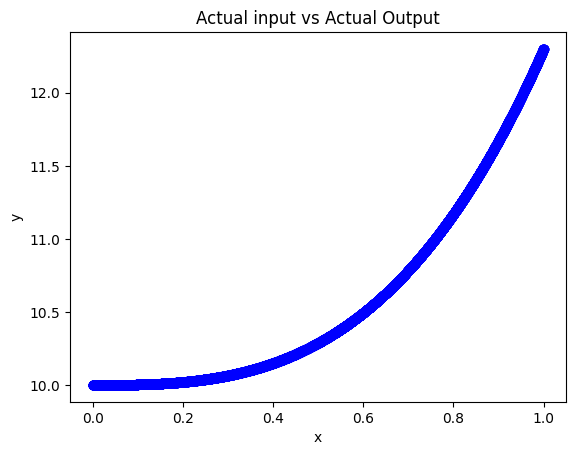

In [143]:
plt.scatter(test['x'], test['y'], color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Actual Output")
plt.show()

### Plotting Actual input vs predicted output

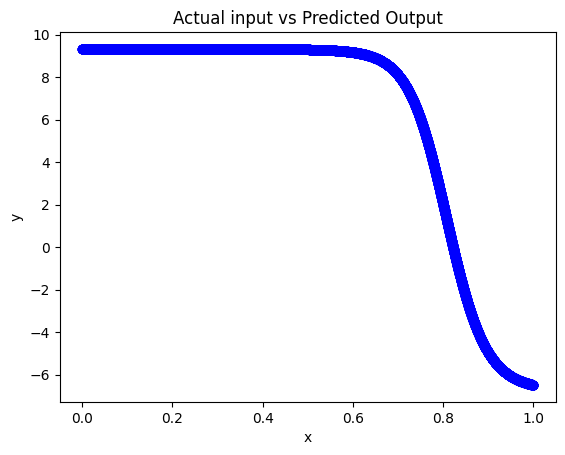

In [144]:
plt.scatter(test['x'], predictions, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Predicted Output")
plt.show()

In [145]:
r2, mae, mse, rmse=calculateErrors(test['y'], predictions)
print("R2: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

R2:  -128.4053819669482
MAE:  4.330821911483138
MSE:  54.56095705443656
RMSE:  7.386538909017982


## **Case 4:**
* **Data:** Use unshuffled and scaled data.
* **NN structure:** Structure 1.
* **Activation function:** Relu.


In [146]:
normalizedTrain=normalize(train)
normalizedVal=normalize(val)
normalizedTest=normalize(test)

In [147]:
normalizedTest

,x,y
0,0.000000,0.813008
1,0.000005,0.813008
2,0.000011,0.813008
3,0.000016,0.813008
4,0.000022,0.813008
...,...,...
14995,0.081277,0.999848
14996,0.081282,0.999886
14997,0.081287,0.999924
14998,0.081293,0.999962


In [148]:
model=Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [149]:
model.compile(optimizer='adam', loss='mse')

In [150]:

offset = model.fit(
    normalizedTrain[['x']],
    normalizedTrain['y'],
    epochs=20,
    batch_size=12,
    validation_data=(normalizedVal[['x']], normalizedVal['y'])
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1986 - val_loss: 0.0048
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.8091e-04 - val_loss: 0.0054
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 9.6517e-05 - val_loss: 0.0060
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.5367e-05 - val_loss: 0.0060
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5.8908e-05 - val_loss: 0.0061
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.6096e-05 - val_loss: 0.0059
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.7780e-05 - val_loss: 0.0059
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.5030e-05 - val_loss: 0.0062
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.0184e-05 - val_loss: 0.0065
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.2644e-05 - val_loss: 0.0066
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.6997e-05 - val_loss: 0.0058
Epoch 12/20


In [151]:
predictions=model.predict(normalizedTest[['x']])
predictions.shape

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


(15000, 1)

## Plots

### Plotting Actual input vs actual output


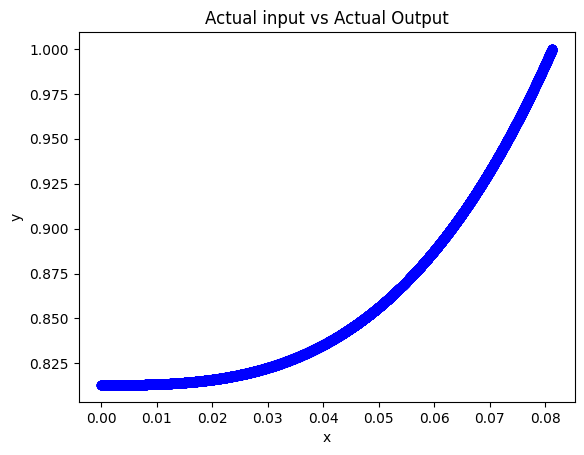

In [152]:
plt.scatter(normalizedTest['x'], normalizedTest['y'], color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Actual Output")
plt.show()

### Plotting Actual input vs predicted output

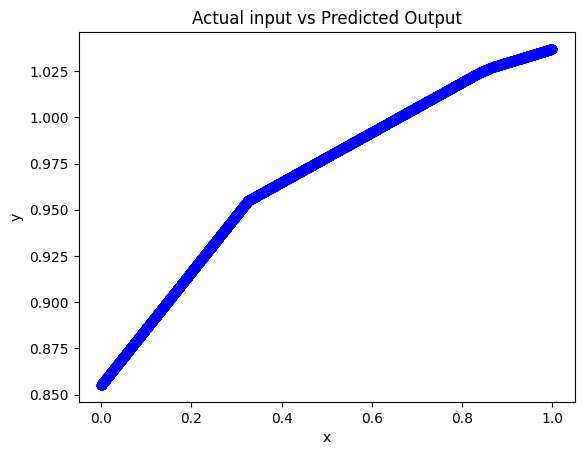

In [153]:
plt.scatter(test['x'], predictions, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Predicted Output")
plt.show()

In [154]:
r2, mae, mse, rmse=calculateErrors(test['y'], predictions)
print("R2: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

R2:  -218.67018184279877
MAE:  9.60466392422232
MSE:  92.61914130222529
RMSE:  9.623883899041244


## **Case 5:**
* **Data:** Use unshuffled and scaled data.
* **NN structure:** Structure 1.
* **Activation function:** tanh.


In [155]:
model=Sequential()
model.add(Dense(12, input_dim=1, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [156]:
model.compile(optimizer='adam', loss='mse')

In [157]:

offset = model.fit(
    normalizedTrain[['x']],
    normalizedTrain['y'],
    epochs=20,
    batch_size=12,
    validation_data=(normalizedVal[['x']], normalizedVal['y'])
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1408 - val_loss: 0.0045
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.0961e-04 - val_loss: 0.0059
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7.1226e-05 - val_loss: 0.0058
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 7.0305e-05 - val_loss: 0.0062
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 7.1102e-05 - val_loss: 0.0062
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7.4353e-05 - val_loss: 0.0068
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7.6571e-05 - val_loss: 0.0063
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7.5904e-05 - val_loss: 0.0061
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 7.3620e-05 - val_loss: 0.0068
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7.4203e-05 - val_loss: 0.0063
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7.5152e-05 - val_loss: 0.0081
Epoch 12/20


In [158]:
predictions=model.predict(normalizedTest[['x']])
predictions.shape

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


(15000, 1)

## Plots

### Plotting Actual input vs actual output


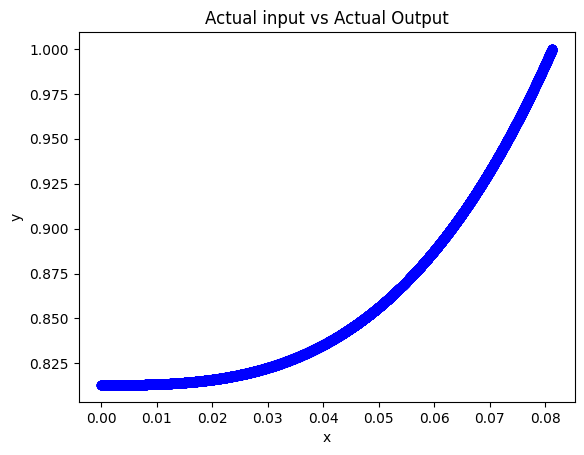

In [159]:
plt.scatter(normalizedTest['x'], normalizedTest['y'], color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Actual Output")
plt.show()

### Plotting Actual input vs predicted output

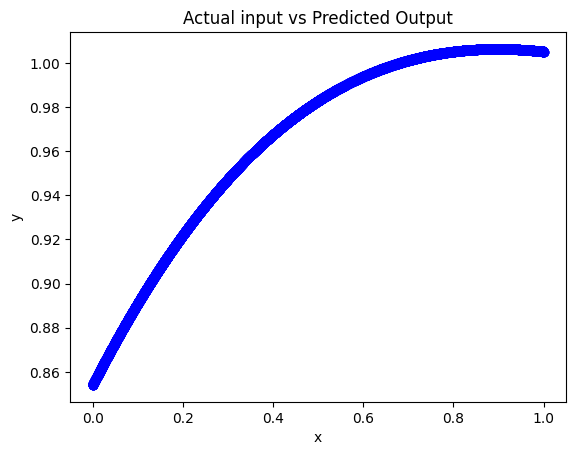

In [160]:
plt.scatter(test['x'], predictions, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Actual input vs Predicted Output")
plt.show()

In [161]:
r2, mae, mse, rmse=calculateErrors(test['y'], predictions)
print("R2: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

R2:  -218.8676094973516
MAE:  9.608328842827808
MSE:  92.70238236699157
RMSE:  9.628207640417378


#### **Q6**
Solve the XOR problem by using a neural network. Design your neural network by assuming all required parameters, such as the number of layers, activation functions, loss function, etc. Present your work to classify the given truth table with sufficient details.

In [94]:
dfXor=pd.DataFrame({'x1':[0,0,1,1],'x2':[0,1,0,1],'y':[0,1,1,0]})
dfXor

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [95]:
modelXor=Sequential()
modelXor.add(Dense(24, activation='relu', input_shape=(2,)))
modelXor.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
modelXor.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [97]:
modelXor.fit(dfXor[['x1','x2']], dfXor['y'], epochs=700, verbose=1)

Epoch 1/700
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step - accuracy: 0.7500 - loss: 0.7150
Epoch 2/700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5000 - loss: 0.7142
Epoch 3/700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5000 - loss: 0.7133
Epoch 4/700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.7125
Epoch 5/700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.7117
Epoch 6/700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.7109
Epoch 7/700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.7101
Epoch 8/700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.7093
Epoch 9/700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.7086
Epoch 10/700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.7078
Epoch 11/700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.7070
Epoch 12/700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2500 - l

In [98]:
dfXorTest=pd.DataFrame({'x1':[0,0,1,1],'x2':[0,1,0,1]})
dfXorTest
predictions=modelXor.predict(dfXorTest)
predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[0.28479153],
       [0.8573869 ],
       [0.82435054],
       [0.14404051]], dtype=float32)

In [99]:
test_loss, test_acc = modelXor.evaluate(dfXor[['x1','x2']], dfXor['y'])
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 1.0000 - loss: 0.2094
Test accuracy: 1.0
Test loss: 0.20943471789360046


In [100]:

predictedClassification=np.where(predictions>0.5,1,0)
df=pd.DataFrame({'x1':[0,0,1,1],'x2':[0,1,0,1],'y':[0,1,1,0],'predicted':predictedClassification.flatten()})
df

,x1,x2,y,predicted
0,0,0,0,0
1,0,1,1,1
2,1,0,1,1
3,1,1,0,0
